# Here provides a clear view of the baseline data: the database structure, retrieves sky map, and calculates key metrics like the number of observations and depth.

In [1]:
from rubin_sim.data import get_baseline

/home/idies/lsst/conda/miniconda3-py37_4.8.2/envs/rubin/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
baseline_file = get_baseline()
baseline_file

'/home/idies/rubin_sim_data/sim_baseline/baseline_v4.0_10yrs.db'

In [3]:
import sqlite3

# Connect to the SQLite database
# Using the custom function get_baseline() to get the database file path
baseline_file = get_baseline()

# Create a connection to the database file
conn = sqlite3.connect(baseline_file)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute SQL query to retrieve the names of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch the result, which contains the names of all tables
tables = cursor.fetchall()

# Print the names of all tables
print("Tables in the database:")
for table in tables:
    print(table[0])  # Print each table name

# Close the database connection
conn.close()  # Release the database connection resources


Tables in the database:
observations
info
events


In [4]:
import sqlite3

# Connect to the SQLite database
# Using the custom function get_baseline() to get the database file path
baseline_file = get_baseline()
conn = sqlite3.connect(baseline_file)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute SQL query to retrieve column information from the 'observations' table
cursor.execute("PRAGMA table_info(observations);")

# Fetch the result, which contains the column information of the 'observations' table
columns = cursor.fetchall()

# Print the column information of the 'observations' table
print("Columns in 'observations' table:")
for column in columns:
    print(column)  # Print each column's information

# Close the database connection
conn.close()  # Release the database connection resources


Columns in 'observations' table:
(0, 'observationId', 'INTEGER', 0, None, 0)
(1, 'fieldRA', 'REAL', 0, None, 0)
(2, 'fieldDec', 'REAL', 0, None, 0)
(3, 'observationStartMJD', 'REAL', 0, None, 0)
(4, 'flush_by_mjd', 'REAL', 0, None, 0)
(5, 'visitExposureTime', 'REAL', 0, None, 0)
(6, 'filter', 'TEXT', 0, None, 0)
(7, 'rotSkyPos', 'REAL', 0, None, 0)
(8, 'rotSkyPos_desired', 'REAL', 0, None, 0)
(9, 'numExposures', 'INTEGER', 0, None, 0)
(10, 'airmass', 'REAL', 0, None, 0)
(11, 'seeingFwhm500', 'REAL', 0, None, 0)
(12, 'seeingFwhmEff', 'REAL', 0, None, 0)
(13, 'seeingFwhmGeom', 'REAL', 0, None, 0)
(14, 'skyBrightness', 'REAL', 0, None, 0)
(15, 'night', 'INTEGER', 0, None, 0)
(16, 'slewTime', 'REAL', 0, None, 0)
(17, 'visitTime', 'REAL', 0, None, 0)
(18, 'slewDistance', 'REAL', 0, None, 0)
(19, 'fiveSigmaDepth', 'REAL', 0, None, 0)
(20, 'altitude', 'REAL', 0, None, 0)
(21, 'azimuth', 'REAL', 0, None, 0)
(22, 'paraAngle', 'REAL', 0, None, 0)
(23, 'pseudoParaAngle', 'REAL', 0, None, 0)
(24, 

In [5]:
baseline_file = get_baseline()
conn = sqlite3.connect(baseline_file)
cursor = conn.cursor()

# Execute SQL query to retrieve column information from the 'info' table
cursor.execute("PRAGMA table_info(info);")
info_columns = cursor.fetchall()

# Print the column information of the 'info' table
print("Columns in 'info' table:")
for column in info_columns:
    print(column)  # Print each column's information

# Execute SQL query to retrieve all data from the 'info' table
cursor.execute("SELECT * FROM info;")
info_data = cursor.fetchall()

# Print the data from the 'info' table
print("Data in 'info' table:")
for data in info_data:
    print(data)  # Print each row of data

# Close the database connection
conn.close()  # Release the database connection resources


Columns in 'info' table:
(0, 'index', 'INTEGER', 0, None, 0)
(1, 'Parameter', 'TEXT', 0, None, 0)
(2, 'Value', 'TEXT', 0, None, 0)
Data in 'info' table:
(0, 'Date, ymd', '2024, 9, 25')
(1, 'hostname', 'sdfmilan116')
(2, 'rubin_scheduler.__version__', '1.2.2.dev26+g08b1603')
(3, 'scheduler', 'scheduler_2023_10_16.tgz')
(4, 'site_models', 'site_models_2023_10_02.tgz')
(5, 'skybrightness_pre', 'skybrightness_pre_2023_10_17.tgz')
(6, 'utils', 'utils_2023_11_02.tgz')
(7, 'maf', 'maf_2024_06_13.tgz')
(8, 'maps', 'maps_2022_2_28.tgz')
(9, 'movingObjects', 'movingObjects_oct_2021.tgz')
(10, 'orbits', 'orbits_2022_3_1.tgz')
(11, 'orbits_precompute', 'orbits_precompute_2023_05_23.tgz')
(12, 'sim_baseline', 'sim_baseline_2024_06_13.tgz')
(13, 'skybrightness', 'skybrightness_2023_09_11.tgz')
(14, 'throughputs', 'throughputs_2023_09_22.tgz')
(15, 'tests', 'tests_2024_04_23.tgz')
(16, 'exec command', ' baseline.py')
(17, 'git hash', '3a44abe045ce91c00df01345316d05a968900e0b\n')
(18, 'file executed',

In [6]:
import sqlite3

# Connect to the SQLite database
baseline_file = get_baseline()  # Get the database file path
conn = sqlite3.connect(baseline_file)  # Establish a connection to the database
cursor = conn.cursor()  # Create a cursor object to execute SQL queries

# Execute the query to get proposalId, number of observations, and average depth
cursor.execute("""
SELECT observationId, COUNT(*) as NumObservations, AVG(fiveSigmaDepth) as AvgDepth
FROM observations
GROUP BY observationId
ORDER BY observationId;
""")

# Fetch the results of the query and print each result
results = cursor.fetchall()  # Get all results
for result in results[:10]:
    print(f'observationId ID: {result[0]}, Number of Observations: {result[1]}, Average Depth: {result[2]:.2f}')  # Print the results

# Close the database connection
conn.close()  # Release the database connection resources


observationId ID: 0, Number of Observations: 1, Average Depth: 23.94
observationId ID: 1, Number of Observations: 1, Average Depth: 23.91
observationId ID: 2, Number of Observations: 1, Average Depth: 23.86
observationId ID: 3, Number of Observations: 1, Average Depth: 23.92
observationId ID: 4, Number of Observations: 1, Average Depth: 23.87
observationId ID: 5, Number of Observations: 1, Average Depth: 23.82
observationId ID: 6, Number of Observations: 1, Average Depth: 23.82
observationId ID: 7, Number of Observations: 1, Average Depth: 23.93
observationId ID: 8, Number of Observations: 1, Average Depth: 24.02
observationId ID: 9, Number of Observations: 1, Average Depth: 24.07


In [7]:
import sqlite3

baseline_file = get_baseline()  # Get the database file path
conn = sqlite3.connect(baseline_file)  # Connect to the SQLite database
cursor = conn.cursor()  # Create a cursor object to execute SQL queries

# Execute a query to retrieve all distinct values from the 'science_program' column in 'observations' table
cursor.execute("SELECT distinct target_name FROM observations")
notes = cursor.fetchall()  # Fetch all the unique 'note' values

# Print each unique 'note' value
for note in notes:
    print(note[0])  # Print the note value

# Close the database connection
conn.close()  # Release the database connection resources



DD:COSMOS
DD:ELAISS1
DD:XMM_LSS
DD:EDFS_a
DD:EDFS_b
DD:ECDFS


In [8]:
import rubin_sim.scheduler as scheduler
import numpy as np

# Set the nside parameter for generating the sky map
nside = 64

# Use SkyAreaGenerator to generate the sky areas based on the nside value
surveyAreas = scheduler.utils.SkyAreaGenerator(nside=nside)

# Generate the map footprints and map labels
map_footprints, map_labels = surveyAreas.return_maps()

# Print the unique values in the map labels
print(np.unique(map_labels))  # This will display the unique labels in the map

/home/idies/lsst/conda/miniconda3-py37_4.8.2/envs/rubin/lib/python3.10/site-packages/rubin_sim/scheduler/__init__.py:6: DeprecationWarning: rubin_sim.scheduler is deprecated, switch to rubin_scheduler.scheduler
  warnings.warn("rubin_sim.scheduler is deprecated, switch to rubin_scheduler.scheduler", DeprecationWarning)


['' 'LMC_SMC' 'bulge' 'dusty_plane' 'lowdust' 'nes' 'scp' 'virgo']


/home/idies/rubin_sim_data/sim_baseline/baseline_v4.0_10yrs.db -- baseline_v4.0_10yrs
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


{'SkyMap': <Figure size 640x480 with 2 Axes>,
 'Histogram': <Figure size 640x480 with 1 Axes>}

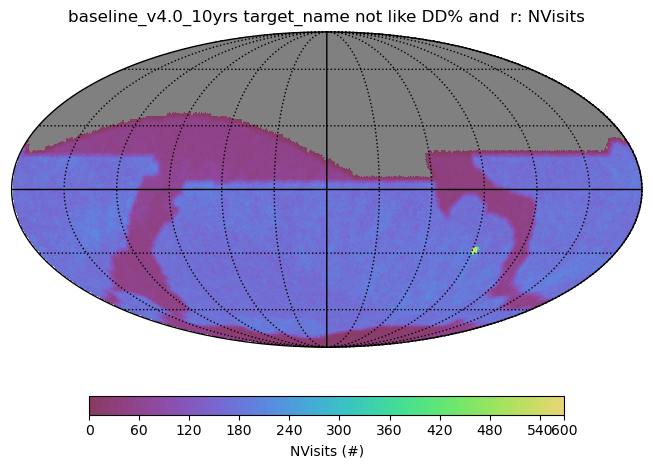

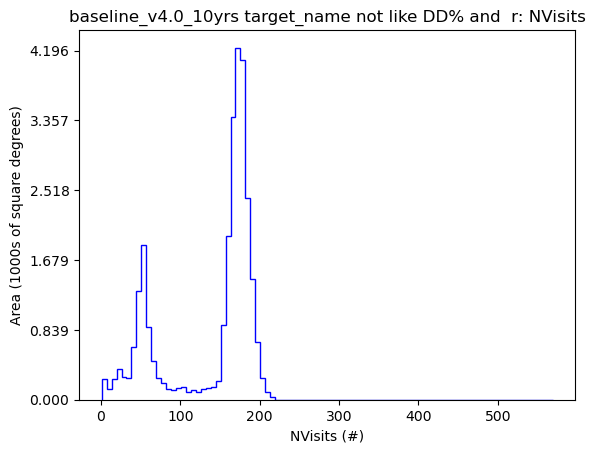

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pandas as pd
import sqlite3
from rubin_scheduler.scheduler.utils import SkyAreaGenerator
import rubin_sim.maf as maf
import rubin_sim
from rubin_sim.data import get_baseline

# Set the nside parameter for Healpix maps
nside = 64

# Generate sky area maps using SkyAreaGenerator
surveyAreas = SkyAreaGenerator(nside=nside)
map_footprints, map_labels = surveyAreas.return_maps()

# Get the baseline database file and extract the run name
opsdb = get_baseline()  # Get the baseline database file path
run_name = os.path.split(opsdb)[-1].replace('.db', '')  # Extract the run name from the file path
print(opsdb, '--', run_name)  # Print the database file and run name

# Select specific map labels based on predefined regions (LMC_SMC, bulge, etc.)
maps = np.where(
    (map_labels == 'LMC_SMC') |
    (map_labels == 'bulge') |
    (map_labels == 'dusty_plane') |
    (map_labels == '') |
    (map_labels == 'lowdust') |
    (map_labels == 'nes') |
    (map_labels == 'scp') |
    (map_labels == 'virgo')
)[0]

# Define the metrics to be calculated: count of observations and depth (coadded magnitude)
count_metric = maf.CountMetric(col='observationStartMJD', metric_name='NVisits')
depth_metric = maf.Coaddm5Metric()

# Create a slicer for Healpix maps based on the selected regions
slicer = maf.HealpixSubsetSlicer(nside=nside, hpid=maps)

# Define a constraint to exclude DDF region and only include 'r' filter
constraint = 'target_name not like "DD%" ' + " and filter == 'r'"

# Create MetricBundles for the two metrics (count and depth)
count_bundle = maf.MetricBundle(count_metric, slicer, constraint, run_name=run_name)
depth_bundle = maf.MetricBundle(depth_metric, slicer, constraint, run_name=run_name)

# Group the MetricBundles and run the analysis
g = maf.MetricBundleGroup({'count': count_bundle, 'depth': depth_bundle}, opsdb, out_dir='tmp_out')
g.run_all()  # Run all metrics

# Plot the count metric results
count_bundle.plot()


In [10]:
import rubin_sim.maf as maf
dir(maf.MetricBundle)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_file_root',
 '_build_metadata',
 '_find_req_cols',
 '_reset_metric_bundle',
 '_setup_metric_values',
 'col_info',
 'compute_summary_stats',
 'load',
 'output_json',
 'plot',
 'read',
 'reduce_metric',
 'set_display_dict',
 'set_plot_dict',
 'set_plot_funcs',
 'set_run_name',
 'set_summary_metrics',
 'write',
 'write_db']

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


{'SkyMap': <Figure size 640x480 with 2 Axes>,
 'Histogram': <Figure size 640x480 with 1 Axes>}

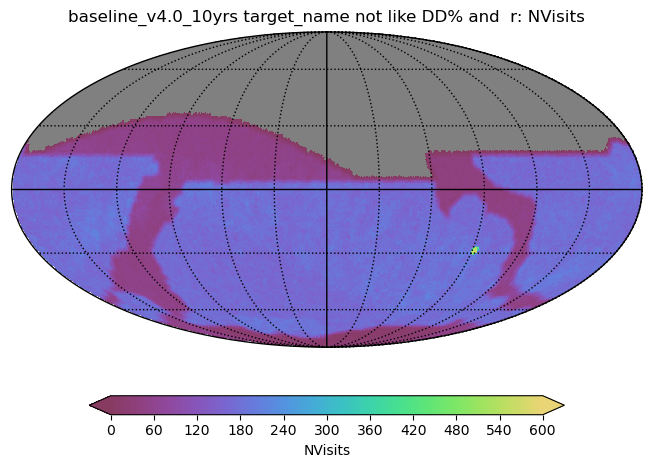

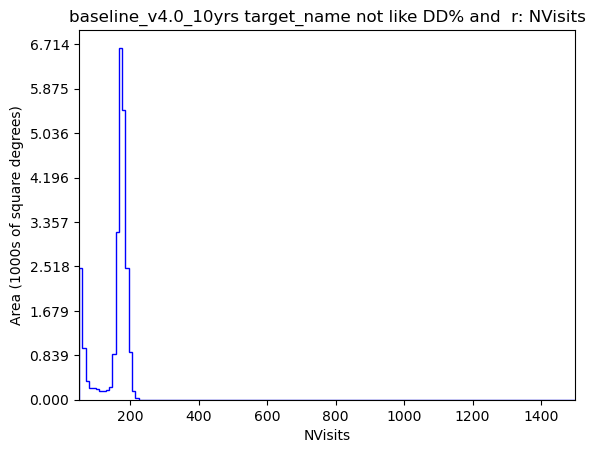

In [11]:
import rubin_sim.maf as maf

# Load the previously saved MetricBundle from a .npz file
bundle = maf.MetricBundle.load("./tmp_out/baseline_v4_0_10yrs_NVisits_target_name_not_like_DD_and_r_HEAL.npz")

# Define the plotting settings in a dictionary
plot_dict = {
    'color_min': 0,      # Minimum value for color scale
    'color_max': 600,    # Maximum value for color scale
    'x_min': 50,         # Minimum value for the x-axis
    'x_max': 1500,       # Maximum value for the x-axis
    'bins': 150,         # Number of bins for the histogram
    "extend": "both"     # Extend the color scale for out-of-range values
}

# Set the plot settings for the MetricBundle
bundle.set_plot_dict(plot_dict)

# Plot the data from the MetricBundle
bundle.plot()
